# Resumen de resultados

**Author** Felipe U.

Librerias

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns

plt.style.use(['seaborn', "seaborn-dark"][0])
plt.rc('axes', titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rcParams.update({'font.size': 16})
plt.rcParams['axes.titlesize'] = 16
plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams.update({'lines.markeredgewidth': 1})
plt.rcParams.update({'errorbar.capsize': 2})

import pickle
from scipy.optimize import minimize

from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from time import time, gmtime, strftime

# Datasets

In [2]:
def plot_dataset(X, y, name):
    fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap="RdYlBu");
    ax.set_title(f"{name} dataset");

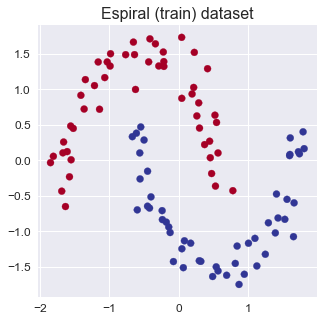

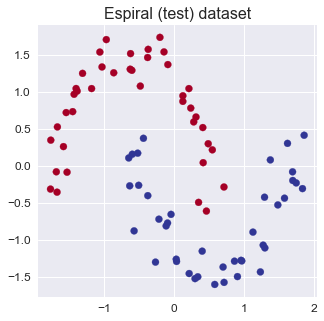

In [3]:
dataset_spiral_train = pickle.load(open("train_dataset_spiral.pickle", "rb"))
dataset_spiral_test = pickle.load(open("test_dataset_spiral.pickle", "rb"))
plot_dataset(dataset_spiral_train[0], dataset_spiral_train[1], "Espiral (train)")
plot_dataset(dataset_spiral_test[0], dataset_spiral_test[1], "Espiral (test)")

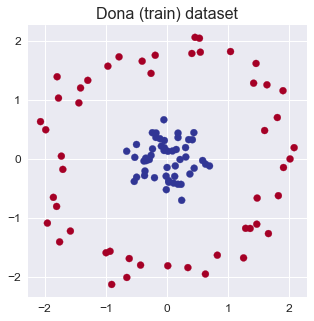

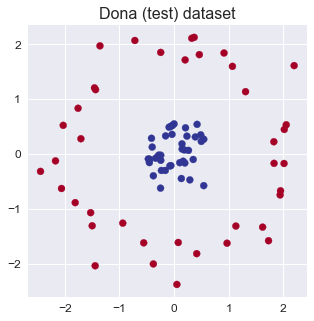

In [4]:
dataset_donut_train = pickle.load(open("train_dataset_donut.pickle", "rb"))
dataset_donut_test = pickle.load(open("test_dataset_donut.pickle", "rb"))
plot_dataset(dataset_donut_train[0], dataset_donut_train[1], "Dona (train)")
plot_dataset(dataset_donut_test[0], dataset_donut_test[1], "Dona (test)")

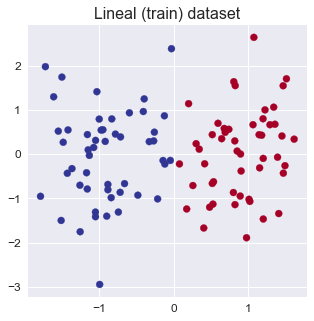

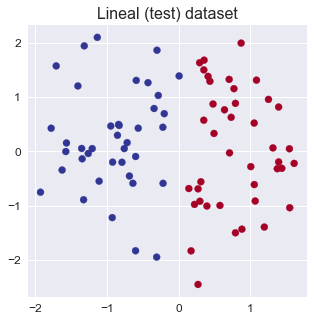

In [5]:
dataset_linear_train = pickle.load(open("train_dataset_linear.pickle", "rb"))
dataset_linear_test = pickle.load(open("test_dataset_linear.pickle", "rb"))
plot_dataset(dataset_linear_train[0], dataset_linear_train[1], "Lineal (train)")
plot_dataset(dataset_linear_test[0], dataset_linear_test[1], "Lineal (test)")

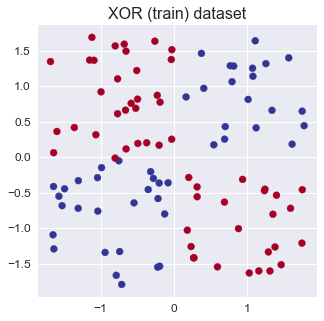

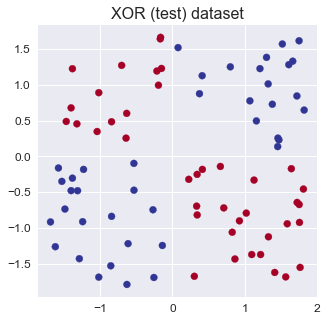

In [6]:
dataset_xor_train = pickle.load(open("train_dataset_xor.pickle", "rb"))
dataset_xor_test = pickle.load(open("test_dataset_xor.pickle", "rb"))
plot_dataset(dataset_xor_train[0], dataset_xor_train[1], "XOR (train)")
plot_dataset(dataset_xor_test[0], dataset_xor_test[1], "XOR (test)")

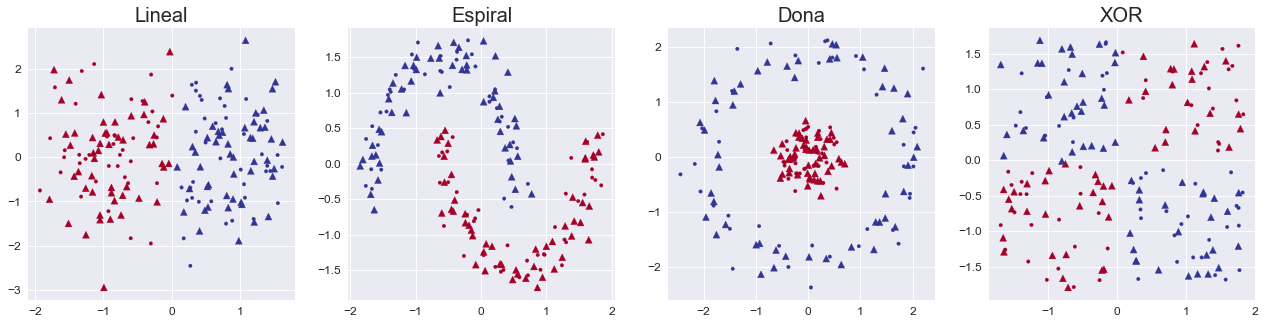

In [7]:
fig, ax = plt.subplots(1, 4, figsize=(5.5*4, 5*1))
for k in range(4):
#     i, j = k//2, k%2
    X, y = [dataset_linear_train, dataset_spiral_train, dataset_donut_train, dataset_xor_train][k]
    ax[k].scatter(X[:, 0], X[:, 1], c=y, cmap="RdYlBu_r", marker="^");
    X, y = [dataset_linear_test, dataset_spiral_test, dataset_donut_test, dataset_xor_test][k]
    ax[k].scatter(X[:, 0], X[:, 1], c=y, cmap="RdYlBu_r", marker=".");
    title = ["Lineal", "Espiral", "Dona", "XOR"][k]
    ax[k].set_title(title, size=20)
plt.savefig("dts.pdf", bbox_inches='tight')

In [8]:
datasets = [[dataset_linear_train, dataset_linear_test], 
            [dataset_spiral_train, dataset_spiral_test], 
            [dataset_donut_train, dataset_donut_test], 
            [dataset_xor_train, dataset_xor_test]]

# Predicciones

## Arbol de decision

Lineal

In [9]:
dt_clf_linear = pickle.load(open("dt_clf_linear.pickle", "rb"))
dt_clf_linear

DecisionTreeClassifier(max_depth=1, random_state=0)

Espiral

In [10]:
dt_clf_spiral = pickle.load(open("dt_clf_spiral.pickle", "rb"))
dt_clf_spiral #dt_clf_spiral.predict(dataset_spiral_train[0])

DecisionTreeClassifier(max_depth=5, random_state=0)

Dona

In [11]:
dt_clf_donut = pickle.load(open("dt_clf_donut.pickle", "rb"))
dt_clf_donut

DecisionTreeClassifier(max_depth=4, random_state=0)

XOR

In [12]:
dt_clf_xor = pickle.load(open("dt_clf_xor.pickle", "rb"))
dt_clf_xor

DecisionTreeClassifier(max_depth=7, random_state=0)

In [13]:
dt_clf = [
    dt_clf_linear, 
    dt_clf_spiral, 
    dt_clf_donut, 
    dt_clf_xor
]

## SVC

Lineal

In [14]:
svc_clf_linear = pickle.load(open("svc_clf_linear.pickle", "rb"))
svc_clf_linear

SVC(C=1, kernel='linear', random_state=0)

Espiral

In [15]:
svc_clf_spiral = pickle.load(open("svc_clf_spiral.pickle", "rb"))
svc_clf_spiral

SVC(C=5, random_state=0)

Dona

In [16]:
svc_clf_donut = pickle.load(open("svc_clf_donut.pickle", "rb"))
svc_clf_donut

SVC(C=1, random_state=0)

XOR

In [17]:
svc_clf_xor = pickle.load(open("svc_clf_xor.pickle", "rb"))
svc_clf_xor

SVC(C=5, random_state=0)

## NN

Lineal

In [18]:
nn_clf_linear = pickle.load(open("nn_clf_linear.pickle", "rb"))
nn_clf_linear

MLPClassifier(activation='tanh', hidden_layer_sizes=(2, 2, 2, 2, 2),
              random_state=0)

Espiral

In [19]:
nn_clf_spiral = pickle.load(open("nn_clf_spiral.pickle", "rb"))
nn_clf_spiral

MLPClassifier(activation='tanh', hidden_layer_sizes=(2, 2, 2, 2, 2),
              random_state=0)

Dona

In [20]:
nn_clf_donut = pickle.load(open("nn_clf_donut.pickle", "rb"))
nn_clf_donut

MLPClassifier(activation='tanh', hidden_layer_sizes=(2, 2, 2, 2, 2),
              random_state=0)

XOR

In [21]:
nn_clf_xor = pickle.load(open("nn_clf_xor.pickle", "rb"))
nn_clf_xor

MLPClassifier(activation='tanh', hidden_layer_sizes=(2, 2, 2, 2, 2),
              random_state=0)

In [22]:
nn_clf = [
    nn_clf_linear, 
    nn_clf_spiral, 
    nn_clf_donut, 
    nn_clf_xor
]

## SVC

Lineal

In [23]:
svc_clf_linear = pickle.load(open("svc_clf_linear.pickle", "rb"))
svc_clf_linear

SVC(C=1, kernel='linear', random_state=0)

Espiral

In [24]:
svc_clf_spiral = pickle.load(open("svc_clf_spiral.pickle", "rb"))
svc_clf_spiral

SVC(C=5, random_state=0)

Dona

In [25]:
svc_clf_donut = pickle.load(open("svc_clf_donut.pickle", "rb"))
svc_clf_donut

SVC(C=1, random_state=0)

XOR

In [26]:
svc_clf_xor = pickle.load(open("svc_clf_xor.pickle", "rb"))
svc_clf_xor

SVC(C=5, random_state=0)

In [27]:
svc_clf = [
    svc_clf_linear, 
    svc_clf_spiral, 
    svc_clf_donut, 
    svc_clf_xor
]

## MLP

Lineal

In [28]:
mlp_clf_linear = pickle.load(open("mlp_clf_linear.pickle", "rb"))
mlp_clf_linear

MLPClassifier(activation='tanh', hidden_layer_sizes=(50,), random_state=0)

Espiral

In [29]:
mlp_clf_spiral = pickle.load(open("mlp_clf_spiral.pickle", "rb"))
mlp_clf_spiral

MLPClassifier(activation='tanh', hidden_layer_sizes=(50,), random_state=0)

Dona

In [30]:
mlp_clf_donut = pickle.load(open("mlp_clf_donut.pickle", "rb"))
mlp_clf_donut

MLPClassifier(activation='tanh', hidden_layer_sizes=(50,), random_state=0)

XOR

In [31]:
mlp_clf_xor = pickle.load(open("mlp_clf_xor.pickle", "rb"))
mlp_clf_xor

MLPClassifier(activation='tanh', hidden_layer_sizes=(50,), random_state=0)

In [32]:
mlp_clf = [
    mlp_clf_linear, 
    mlp_clf_spiral, 
    mlp_clf_donut, 
    mlp_clf_xor
]

## ODENet

In [33]:
def dynamic_odenet(control, X, alpha=1):
    
    dimension = 2
    num_layers = 5
    activation_function = lambda x: np.tanh(x)
    dt = 1/num_layers
    
    O = []
    T = []
    for k in range(X.shape[0]):
        x0 = X[k]
        xn = x0.copy()
        x = [xn]
        for i in range(num_layers):
            ix = (dimension*(dimension+1)+1)*i
            jx = ix+dimension*dimension
            zx = jx+dimension
            K = control[ix:jx]
            be = control[jx:zx]
            Dt = control[zx]
            KK = np.array([
                [K[0], K[1]],
                [K[2], K[3]]
            ])
            xn = (xn + alpha*Dt*activation_function(KK@xn + be)).copy()
            xn = xn
            x.append(xn)

        ix = dimension*(dimension+1)
        jx = -ix+dimension*dimension
        W = control[-ix:jx]
        mu = control[jx:]
        WW = np.array([
            [W[0], W[1]],
            [W[2], W[3]]
        ]) 
        xf = (WW@xn + mu).copy()
        x.append(xf)
        T.append(x)
        sxf = np.exp(xf)
        sxf /= sum(sxf)
        o = sxf[1]
        O.append(o)
    O = np.array(O)
    return O, T

In [34]:
def clf_odenet(x, control, alpha):
    O, _ = dynamic_odenet(control, x, alpha)
    return (O>0.5).astype(int)

Lineal

In [35]:
odenet_alpha_linear, odenet_optimal_control_linear = pickle.load(open("odenet_linear.pickle", "rb"))
odenet_alpha_linear, odenet_optimal_control_linear.shape 
#clf_odenet(dataset_linear_train[0], odenet_optimal_control_linear, odenet_alpha_linear)

(0.25, (41,))

Espiral

In [36]:
odenet_alpha_spiral, odenet_optimal_control_spiral = pickle.load(open("odenet_spiral.pickle", "rb"))
odenet_alpha_spiral, odenet_optimal_control_spiral.shape

(0.15, (41,))

Dona

In [37]:
odenet_alpha_donut, odenet_optimal_control_donut = pickle.load(open("odenet_donut.pickle", "rb"))
odenet_alpha_donut, odenet_optimal_control_donut.shape

(0.25, (41,))

XOR

In [38]:
odenet_alpha_xor, odenet_optimal_control_xor = pickle.load(open("odenet_xor.pickle", "rb"))
odenet_alpha_xor, odenet_optimal_control_xor.shape

(0.099, (41,))

In [39]:
odenet_optimal_control = [
    odenet_optimal_control_linear, 
    odenet_optimal_control_spiral, 
    odenet_optimal_control_donut, 
    odenet_optimal_control_xor
]
odenet_alpha = [
    odenet_alpha_linear, 
    odenet_alpha_spiral, 
    odenet_alpha_donut, 
    odenet_alpha_xor
]

## ResNet

In [40]:
def dynamic_resnet(control, X, alpha=1):
    
    dimension = 2
    num_layers = 15
    activation_function = lambda x: np.tanh(x)
    dt = 1/num_layers
    
    O = []
    T = []
    for k in range(X.shape[0]):
        x0 = X[k]
        xn = x0.copy()
        x = [xn]
        for i in range(num_layers):
            ix = dimension*(dimension+1)*i
            jx = ix+dimension*dimension
            zx = jx+dimension
            K = control[ix:jx]
            be = control[jx:zx]
            KK = np.array([
                [K[0], K[1]],
                [K[2], K[3]]
            ])
            xn = (xn + alpha*dt*activation_function(KK@xn + be)).copy()
            xn = xn
            x.append(xn)

        ix = dimension*(dimension+1)
        jx = -ix+dimension*dimension
        W = control[-ix:jx]
        mu = control[jx:]
        WW = np.array([
            [W[0], W[1]],
            [W[2], W[3]]
        ]) 
        xf = (WW@xn + mu).copy()
        x.append(xf)
        T.append(x)
        sxf = np.exp(xf)
        sxf /= sum(sxf)
        o = sxf[1]
        O.append(o)
    O = np.array(O)
    return O, T

In [41]:
def clf_resnet(x, control, alpha):
    O, _ = dynamic_resnet(control, x, alpha)
    return (O>0.5).astype(int)

Lineal

In [42]:
resnet_alpha_linear, resnet_optimal_control_linear = pickle.load(open("resnet_linear.pickle", "rb"))
resnet_alpha_linear, resnet_optimal_control_linear.shape 

(1, (96,))

Espiral

In [43]:
resnet_alpha_spiral, resnet_optimal_control_spiral = pickle.load(open("resnet_spiral.pickle", "rb"))
resnet_alpha_spiral, resnet_optimal_control_spiral.shape

(1, (96,))

Dona

In [44]:
resnet_alpha_donut, resnet_optimal_control_donut = pickle.load(open("resnet_donut.pickle", "rb"))
resnet_alpha_donut, resnet_optimal_control_donut.shape

(7, (96,))

XOR

In [45]:
resnet_alpha_xor, resnet_optimal_control_xor = pickle.load(open("resnet_xor.pickle", "rb"))
resnet_alpha_xor, resnet_optimal_control_xor.shape

(8, (96,))

In [46]:
resnet_optimal_control = [
    resnet_optimal_control_linear, 
    resnet_optimal_control_spiral, 
    resnet_optimal_control_donut, 
    resnet_optimal_control_xor
]
resnet_alpha = [
    resnet_alpha_linear, 
    resnet_alpha_spiral, 
    resnet_alpha_donut, 
    resnet_alpha_xor
]

## Preds

In [47]:
%%time
preds = []
for i, data_name in enumerate("Lineal Espiral Dona XOR".split()):
    dataset_i = datasets[i]
    for j, set_name in enumerate("Train Test".split()):
        set_j = dataset_i[j]
        for k, model_name in enumerate("DT SVC MLP NN ResNet ODENet".split()):
            start = time()
            o = {"Dataset": data_name, "Set": set_name, "Modelo": model_name}
            if model_name == "ResNet":
                resnet_optimal_control_i = resnet_optimal_control[i]
                resnet_alpha_i = resnet_alpha[i]
                o["preds"] = clf_resnet(set_j[0], resnet_optimal_control_i, resnet_alpha_i)
            elif model_name == "ODENet":
                odenet_optimal_control_i = odenet_optimal_control[i]
                odenet_alpha_i = odenet_alpha[i]
                o["preds"] = clf_odenet(set_j[0], odenet_optimal_control_i, odenet_alpha_i)
            elif model_name == "SVC":
                svc_clf_i = svc_clf[i]
                o["preds"] = svc_clf_i.predict(set_j[0])
            elif model_name == "DT":
                dt_clf_i = dt_clf[i]
                o["preds"] = dt_clf_i.predict(set_j[0])
            elif model_name == "MLP":
                mlp_clf_i = mlp_clf[i]
                o["preds"] = mlp_clf_i.predict(set_j[0])
            elif model_name == "NN":
                nn_clf_i = nn_clf[i]
                o["preds"] = nn_clf_i.predict(set_j[0])
            end = time()
            o["time"] = end-start
            preds.append(o)

CPU times: total: 141 ms
Wall time: 135 ms


# Metricas

In [48]:
from sklearn.metrics import accuracy_score

In [49]:
accuracy_data = []
for pred in preds:
    data_name = pred["Dataset"]
    set_name = pred["Set"]
    
    i, j = "Lineal Espiral Dona XOR".split().index(data_name), "Train Test".split().index(set_name)
    set_j_dataset_ij = datasets[i][j]
    o = {'Dataset': data_name,
         'Set': set_name,
         'Modelo': pred["Modelo"]}
    o["Accuracy"] = accuracy_score(set_j_dataset_ij[1], pred["preds"])
    accuracy_data.append(o)

In [50]:
import pandas as pd

In [51]:
accuracy_table = pd.DataFrame(accuracy_data)
accuracy_table

,Dataset,Set,Modelo,Accuracy
0,Lineal,Train,DT,1.0000
1,Lineal,Train,SVC,0.9900
2,Lineal,Train,MLP,1.0000
3,Lineal,Train,NN,0.9900
4,Lineal,Train,ResNet,1.0000
5,Lineal,Train,ODENet,1.0000
6,Lineal,Test,DT,1.0000
7,Lineal,Test,SVC,0.9875
8,Lineal,Test,MLP,1.0000
9,Lineal,Test,NN,0.9875


In [52]:
summary = accuracy_table.pivot(index='Modelo', columns="Dataset Set".split(), values="Accuracy")
summary = summary.apply(lambda x: np.round(100*x, 2))
summary

Dataset Lineal         Espiral           Dona            XOR       
Set      Train    Test   Train    Test  Train    Test  Train   Test
Modelo                                                             
DT       100.0  100.00   100.0   97.50  100.0   90.00   98.0  95.00
MLP      100.0  100.00    89.0   87.50   99.0   98.75   99.0  98.75
NN        99.0   98.75    86.0   86.25   69.0   68.75   56.0  48.75
ODENet   100.0  100.00   100.0   98.75  100.0  100.00  100.0  96.25
ResNet   100.0  100.00   100.0   98.75  100.0   98.75   96.0  88.75
SVC       99.0   98.75   100.0  100.00  100.0  100.00  100.0  98.75

In [53]:
print(summary.to_latex())

\begin{tabular}{lrrrrrrrr}
\toprule
Dataset & \multicolumn{2}{l}{Lineal} & \multicolumn{2}{l}{Espiral} & \multicolumn{2}{l}{Dona} & \multicolumn{2}{l}{XOR} \\
Set &  Train &    Test &   Train &    Test &  Train &    Test &  Train &   Test \\
Modelo &        &         &         &         &        &         &        &        \\
\midrule
DT     &  100.0 &  100.00 &   100.0 &   97.50 &  100.0 &   90.00 &   98.0 &  95.00 \\
MLP    &  100.0 &  100.00 &    89.0 &   87.50 &   99.0 &   98.75 &   99.0 &  98.75 \\
NN     &   99.0 &   98.75 &    86.0 &   86.25 &   69.0 &   68.75 &   56.0 &  48.75 \\
ODENet &  100.0 &  100.00 &   100.0 &   98.75 &  100.0 &  100.00 &  100.0 &  96.25 \\
ResNet &  100.0 &  100.00 &   100.0 &   98.75 &  100.0 &   98.75 &   96.0 &  88.75 \\
SVC    &   99.0 &   98.75 &   100.0 &  100.00 &  100.0 &  100.00 &  100.0 &  98.75 \\
\bottomrule
\end{tabular}



C:\Users\felip\AppData\Local\Temp\ipykernel_7516\1495726269.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(summary.to_latex())


# Tiempos

In [54]:
dt_times = pickle.load(open("dt_times.pickle", "rb"))
svc_times = pickle.load(open("svc_times.pickle", "rb"))
mlp_times = pickle.load(open("mlp_times.pickle", "rb"))
nn_times = pickle.load(open("nn_times.pickle", "rb"))
resnet_times = pickle.load(open("resnet_times.pickle", "rb"))
odenet_times = pickle.load(open("odenet_times.pickle", "rb"))

In [55]:
train_times_ = [
    dt_times,
    svc_times,
    mlp_times,
    nn_times,
    resnet_times,
    odenet_times
]

In [56]:
train_times = []
for i, times in enumerate(train_times_):
    model_name = "DT SVC MLP NN ResNet ODENet".split()[i]
    for j, set_name in enumerate("Lineal Espiral Dona XOR".split()):
        o = {
            'Dataset': set_name,
            'Modelo': model_name,
            "Tiempo (s)": times[j]
        }
        train_times.append(o)

In [57]:
inference_times = []
for pred in preds:
    if pred["Set"] == "Test":
        o = {
            'Dataset': pred["Dataset"],
            'Modelo': pred["Modelo"],
            "Tiempo (ms)": pred["time"]*1000
        }
        inference_times.append(o)
inference_times

[{'Dataset': 'Lineal', 'Modelo': 'DT', 'Tiempo (ms)': 0.0},
 {'Dataset': 'Lineal', 'Modelo': 'SVC', 'Tiempo (ms)': 0.0},
 {'Dataset': 'Lineal', 'Modelo': 'MLP', 'Tiempo (ms)': 0.0},
 {'Dataset': 'Lineal', 'Modelo': 'NN', 'Tiempo (ms)': 0.0},
 {'Dataset': 'Lineal', 'Modelo': 'ResNet', 'Tiempo (ms)': 10.010480880737305},
 {'Dataset': 'Lineal', 'Modelo': 'ODENet', 'Tiempo (ms)': 4.0035247802734375},
 {'Dataset': 'Espiral', 'Modelo': 'DT', 'Tiempo (ms)': 0.0},
 {'Dataset': 'Espiral', 'Modelo': 'SVC', 'Tiempo (ms)': 1.0004043579101562},
 {'Dataset': 'Espiral', 'Modelo': 'MLP', 'Tiempo (ms)': 0.0},
 {'Dataset': 'Espiral', 'Modelo': 'NN', 'Tiempo (ms)': 0.0},
 {'Dataset': 'Espiral', 'Modelo': 'ResNet', 'Tiempo (ms)': 10.009288787841797},
 {'Dataset': 'Espiral', 'Modelo': 'ODENet', 'Tiempo (ms)': 4.004001617431641},
 {'Dataset': 'Dona', 'Modelo': 'DT', 'Tiempo (ms)': 0.0},
 {'Dataset': 'Dona', 'Modelo': 'SVC', 'Tiempo (ms)': 1.001596450805664},
 {'Dataset': 'Dona', 'Modelo': 'MLP', 'Tiempo (ms

In [58]:
train_table = pd.DataFrame(train_times)
train_table

,Dataset,Modelo,Tiempo (s)
0,Lineal,DT,0.001001
1,Espiral,DT,0.001001
2,Dona,DT,0.000000
3,XOR,DT,0.001002
4,Lineal,SVC,0.000000
5,Espiral,SVC,0.001001
6,Dona,SVC,0.000000
7,XOR,SVC,0.001001
8,Lineal,MLP,0.088080
9,Espiral,MLP,0.092083


In [59]:
summary = train_table.pivot(index='Modelo', columns="Dataset".split(), values="Tiempo (s)")
summary = summary.apply(lambda x: np.round(x, 2))
summary = summary["Lineal Espiral Dona XOR".split()].loc["DT SVC MLP NN ResNet ODENet".split()]
summary

Dataset,Lineal,Espiral,Dona,XOR
Modelo,,,,
DT,0.00,0.00,0.00,0.00
SVC,0.00,0.00,0.00,0.00
MLP,0.09,0.09,0.09,0.09
NN,0.14,0.14,0.14,0.14
ResNet,33.60,57.72,184.40,430.62
ODENet,6.50,29.14,28.64,62.31


In [60]:
print(summary.to_latex())

\begin{tabular}{lrrrr}
\toprule
Dataset &  Lineal &  Espiral &    Dona &     XOR \\
Modelo &         &          &         &         \\
\midrule
DT     &    0.00 &     0.00 &    0.00 &    0.00 \\
SVC    &    0.00 &     0.00 &    0.00 &    0.00 \\
MLP    &    0.09 &     0.09 &    0.09 &    0.09 \\
NN     &    0.14 &     0.14 &    0.14 &    0.14 \\
ResNet &   33.60 &    57.72 &  184.40 &  430.62 \\
ODENet &    6.50 &    29.14 &   28.64 &   62.31 \\
\bottomrule
\end{tabular}



C:\Users\felip\AppData\Local\Temp\ipykernel_7516\1495726269.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(summary.to_latex())


In [61]:
inference_table = pd.DataFrame(inference_times)
inference_table

,Dataset,Modelo,Tiempo (ms)
0,Lineal,DT,0.000000
1,Lineal,SVC,0.000000
2,Lineal,MLP,0.000000
3,Lineal,NN,0.000000
4,Lineal,ResNet,10.010481
5,Lineal,ODENet,4.003525
6,Espiral,DT,0.000000
7,Espiral,SVC,1.000404
8,Espiral,MLP,0.000000
9,Espiral,NN,0.000000


In [62]:
summary = inference_table.pivot(index='Modelo', columns="Dataset".split(), values="Tiempo (ms)")
summary = summary.apply(lambda x: np.round(x, 3))
summary = summary["Lineal Espiral Dona XOR".split()].loc["DT SVC MLP NN ResNet ODENet".split()]
summary

Dataset,Lineal,Espiral,Dona,XOR
Modelo,,,,
DT,0.000,0.000,0.000,0.000
SVC,0.000,1.000,1.002,1.000
MLP,0.000,0.000,0.000,0.000
NN,0.000,0.000,0.000,0.000
ResNet,10.010,10.009,10.009,9.009
ODENet,4.004,4.004,4.003,5.004


In [63]:
print(summary.to_latex())

\begin{tabular}{lrrrr}
\toprule
Dataset &  Lineal &  Espiral &    Dona &    XOR \\
Modelo &         &          &         &        \\
\midrule
DT     &   0.000 &    0.000 &   0.000 &  0.000 \\
SVC    &   0.000 &    1.000 &   1.002 &  1.000 \\
MLP    &   0.000 &    0.000 &   0.000 &  0.000 \\
NN     &   0.000 &    0.000 &   0.000 &  0.000 \\
ResNet &  10.010 &   10.009 &  10.009 &  9.009 \\
ODENet &   4.004 &    4.004 &   4.003 &  5.004 \\
\bottomrule
\end{tabular}



C:\Users\felip\AppData\Local\Temp\ipykernel_7516\1495726269.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(summary.to_latex())


# Region de decision

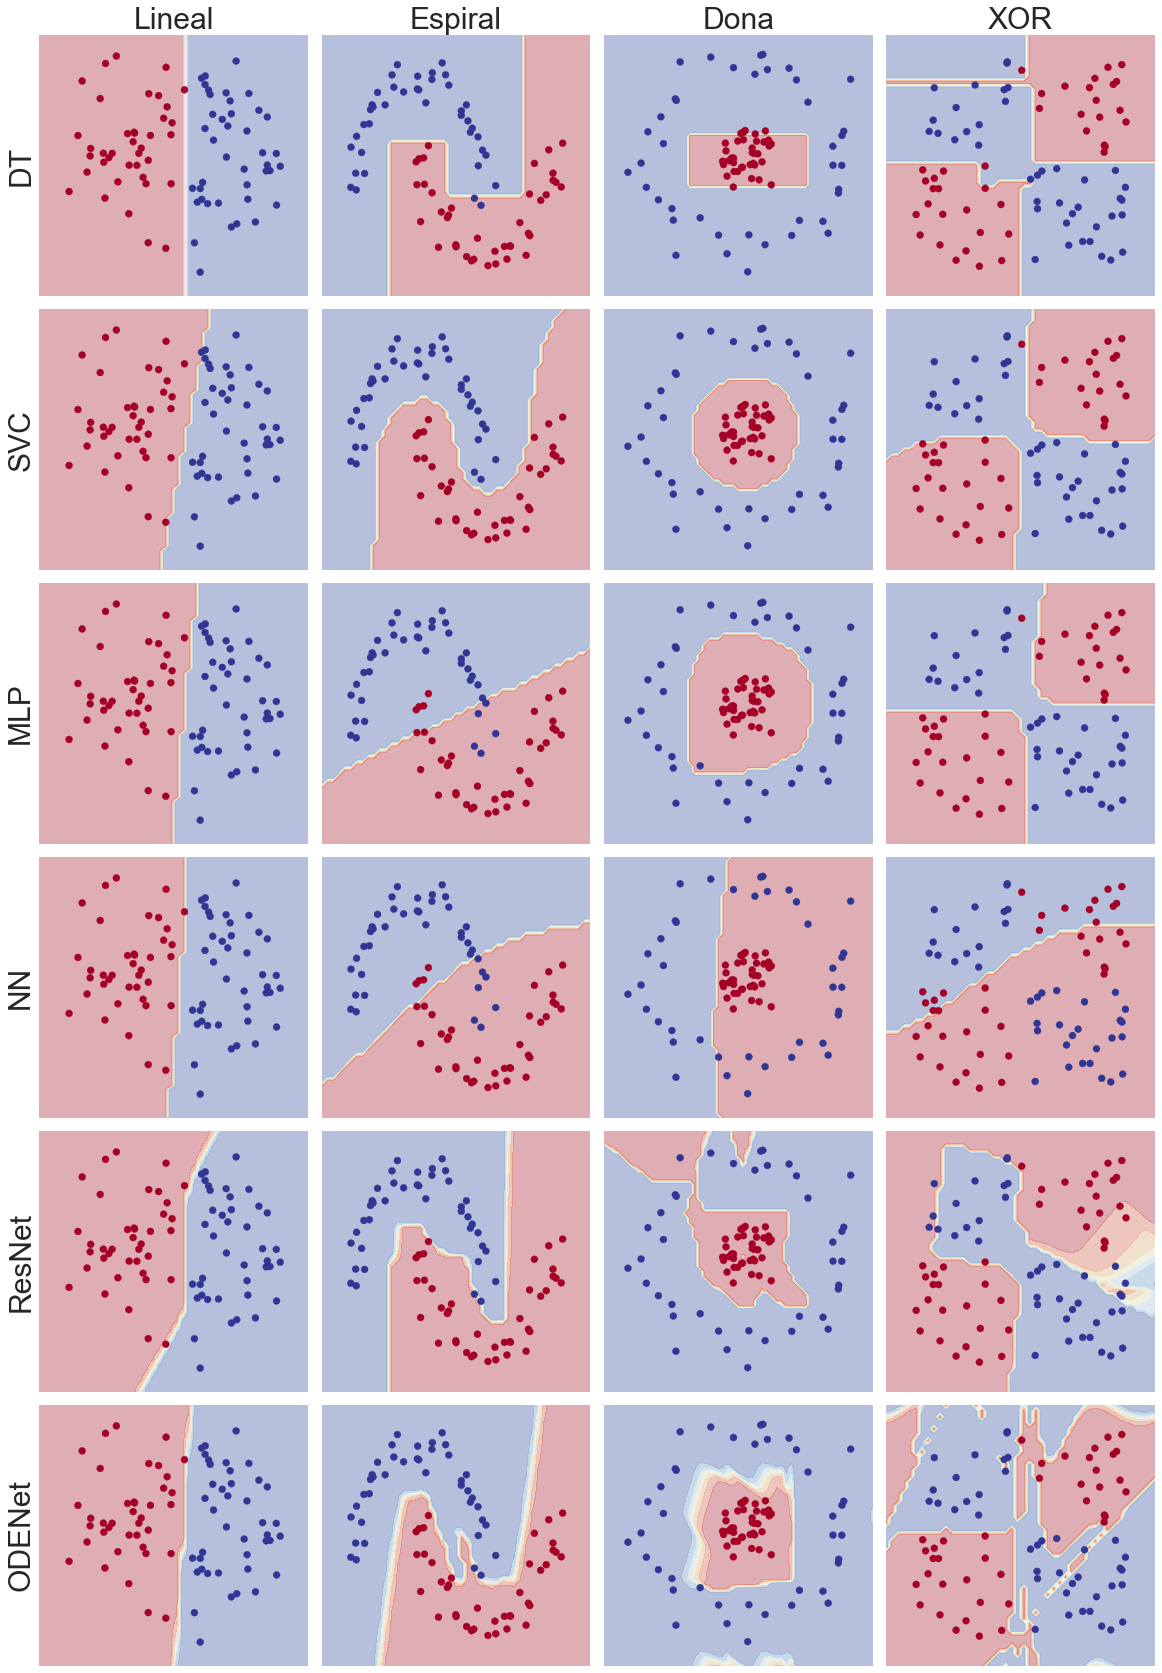

In [72]:
fig, ax = plt.subplots(6, 4, figsize=(5*4, 5*6))
for i, data_name in enumerate("Lineal Espiral Dona XOR".split()):
    test_dataset_ij = datasets[i][1]
    h=0.1
    X = test_dataset_ij[0]
    y = test_dataset_ij[1]
    x_min, x_max = X[:,0].min()-0.5, X[:,0].max()+0.5
    y_min, y_max = X[:,1].min()-0.5, X[:,1].max()+0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))

    for k, model_name in enumerate("DT SVC MLP NN ResNet ODENet".split()):
        x = np.c_[xx.ravel(), yy.ravel()]
        if model_name == "ResNet":
            control = resnet_optimal_control[i]
            alpha = resnet_alpha[i]
            Z, _ = dynamic_resnet(control, x, alpha)
        elif model_name == "ODENet":
            control = odenet_optimal_control[i]
            alpha = odenet_alpha[i]
            Z, _ = dynamic_odenet(control, x, alpha)
        else:
            clf = [dt_clf, svc_clf, mlp_clf, nn_clf][k][i]
            Z = clf.predict(x)
        Z = Z.reshape(xx.shape)  
        ax[k, i].contourf(xx, yy, Z, cmap="RdYlBu_r", alpha=0.3)
        ax[k, i].scatter(X[:,0], X[:,1], c=y, cmap="RdYlBu_r", marker="o")
        ax[k, i].set_xticks([])
        ax[k, i].set_yticks([]);
        if i == 0:
            ax[k, i].set_ylabel(model_name, size=30)
        if k == 0:
            ax[k, i].set_title(data_name, size=30)
fig.subplots_adjust(wspace=0.05, hspace=0.05)
plt.savefig("reg.pdf", bbox_inches='tight')
plt.savefig("reg.png", bbox_inches='tight', transparent=True)

## Visualizacion de transformacion y trayectorias

In [65]:
def get_cls(control):
        ix = 2*(2+1)
        jx = -ix+2*2
        W = control[-ix:jx]
        mu = control[jx:]
        WW = np.array([
            [W[0], W[1]],
            [W[2], W[3]]
        ]) 
        return WW, mu

In [66]:
def clf_cls(x, WW, mu):
    o = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        xf = WW@x[i]+mu
        sxf = np.exp(xf)
        sxf /= sum(sxf)
        o[i] = sxf[1]
    return o

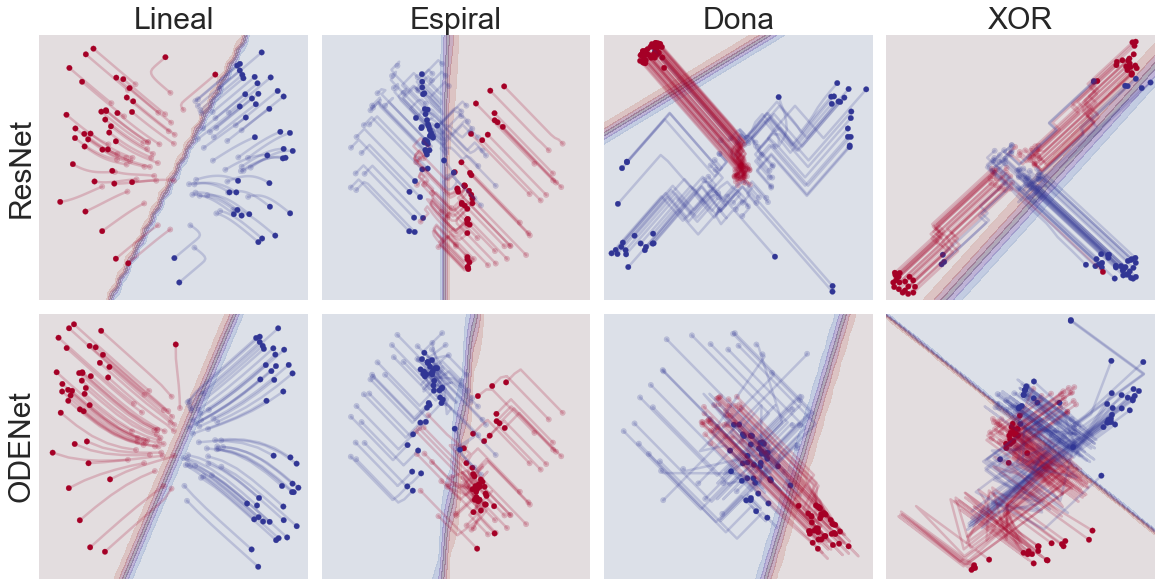

In [88]:
fig, ax = plt.subplots(2, 4, figsize=(5*4, 5*2))
for i, data_name in enumerate("Lineal Espiral Dona XOR".split()):
    test_dataset_ij = datasets[i][1]
    X = test_dataset_ij[0]
    y = test_dataset_ij[1]
    for j, model_name in enumerate("ResNet ODENet".split()):
        if j == 0:
            O, T = dynamic_resnet(resnet_optimal_control[i], X, resnet_alpha[i])
            WW, mu = get_cls(resnet_optimal_control[i])
        elif j == 1:
            O, T = dynamic_odenet(odenet_optimal_control[i], X, odenet_alpha[i])
            WW, mu = get_cls(odenet_optimal_control[i])        
        T = np.array(T)
        
        h=0.2
        x_min, x_max = T[:,:-1, 0].min()-0.5, T[:,:-1, 0].max()+0.5
        y_min, y_max = T[:,:-1, 1].min()-0.5, T[:,:-1, 1].max()+0.5
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                                 np.arange(y_min, y_max, h))
    
        x = np.c_[xx.ravel(), yy.ravel()]
        if model_name == "ResNet":
            control = resnet_optimal_control[i]
            alpha = resnet_alpha[i]
            Z = clf_cls(x, WW, mu)
        elif model_name == "ODENet":
            control = odenet_optimal_control[i]
            alpha = odenet_alpha[i]
            Z = clf_cls(x, WW, mu)
        else:
            clf = [dt_clf, svc_clf, mlp_clf, nn_clf][k][i]
            Z = clf.predict(x)
        Z = Z.reshape(xx.shape)  
        ax[j, i].contourf(xx, yy, Z, cmap="twilight", alpha=0.3)
        
        pond = np.exp(np.linspace(0, 0, T.shape[1]-1))
        for t in range(T.shape[0]):
            ax[j, i].plot(T[t, :-1, 0]*pond, T[t, :-1, 1]*pond, c=[plt.cm.RdYlBu.get_over(), plt.cm.RdYlBu.get_under()][y[t]], alpha=0.2, linewidth=2.5)
        ax[j, i].scatter(T[:, 0, 0]*pond[0], T[:, 0, 1]*pond[0], c=y, cmap="RdYlBu_r", marker="o", alpha=0.2, s=30)
        ax[j, i].scatter(T[:, -2, 0]*pond[-1], T[:, -2, 1]*pond[-1], c=y, cmap="RdYlBu_r", marker="o", s=30)
        
        ax[j, i].set_xticks([])
        ax[j, i].set_yticks([])
        
        if i == 0:
            ax[j, i].set_ylabel(model_name, size=30)
        if j == 0:
            ax[j, i].set_title(data_name, size=30)
fig.subplots_adjust(wspace=0.05, hspace=0.05)
plt.savefig("tray.pdf", bbox_inches='tight')
plt.savefig("tray.png", bbox_inches='tight', transparent=True)